Importing the cython-built module `gintsieve`.

In [1]:
from gintsieve import *

## Generating Gaussian Primes and Basic Operations

Getting Gaussian primes up to norm $1000$ in the first quadrant. A `Gints` object is returned, which is a numpy array with a few special attributes and methods. Printing the object as native-python complex numbers.

In [2]:
a = gprimes(1000)
a.to_complex()

Gints([ 1. +1.j,  2. +1.j,  1. +2.j,  3. +0.j,  3. +2.j,  2. +3.j,
        4. +1.j,  1. +4.j,  5. +2.j,  2. +5.j,  6. +1.j,  1. +6.j,
        5. +4.j,  4. +5.j,  7. +0.j,  7. +2.j,  2. +7.j,  6. +5.j,
        5. +6.j,  8. +3.j,  3. +8.j,  8. +5.j,  5. +8.j,  9. +4.j,
        4. +9.j, 10. +1.j,  1.+10.j, 10. +3.j,  3.+10.j,  8. +7.j,
        7. +8.j, 11. +0.j, 11. +4.j,  4.+11.j, 10. +7.j,  7.+10.j,
       11. +6.j,  6.+11.j, 13. +2.j,  2.+13.j, 10. +9.j,  9.+10.j,
       12. +7.j,  7.+12.j, 14. +1.j,  1.+14.j, 15. +2.j,  2.+15.j,
       13. +8.j,  8.+13.j, 15. +4.j,  4.+15.j, 16. +1.j,  1.+16.j,
       13.+10.j, 10.+13.j, 14. +9.j,  9.+14.j, 16. +5.j,  5.+16.j,
       17. +2.j,  2.+17.j, 13.+12.j, 12.+13.j, 14.+11.j, 11.+14.j,
       16. +9.j,  9.+16.j, 18. +5.j,  5.+18.j, 17. +8.j,  8.+17.j,
       19. +0.j, 18. +7.j,  7.+18.j, 17.+10.j, 10.+17.j, 19. +6.j,
        6.+19.j, 20. +1.j,  1.+20.j, 20. +3.j,  3.+20.j, 15.+14.j,
       14.+15.j, 17.+12.j, 12.+17.j, 20. +7.j,  7.+20.j, 21. +

Counting Gaussian primes by powers of 10. Each prime in the first quadrant has four associates; each associate is counted separately.

In [3]:
for k in range(0, 10):
    print('Number of primes up to norm 10^{}: {}'.format(k, count_gprimes(10 ** k)))

Number of primes up to norm 10^0: 0
Number of primes up to norm 10^1: 16
Number of primes up to norm 10^2: 100
Number of primes up to norm 10^3: 668
Number of primes up to norm 10^4: 4928
Number of primes up to norm 10^5: 38404
Number of primes up to norm 10^6: 313752
Number of primes up to norm 10^7: 2658344
Number of primes up to norm 10^8: 23046512
Number of primes up to norm 10^9: 203394764


We can get Gaussian primes within a sector in complex plane. Below we get Gaussian primes with angle measure in the interval $[0.1, 0.6)$ and norm up to $10^5$. We plot them.

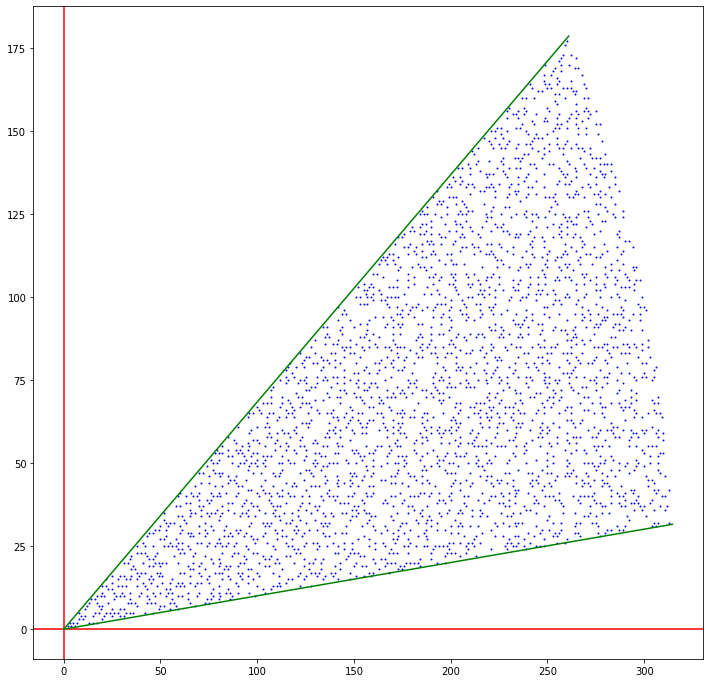

In [4]:
s = gprimes_in_sector(10 ** 5, .1, .6)
s.plot()

Looking at a rectangular block of Gaussian primes. The real and imaginary parts $a$ and $b$ satisfy $10000 \le a < 10200$ and $20000 \le b < 20100$.

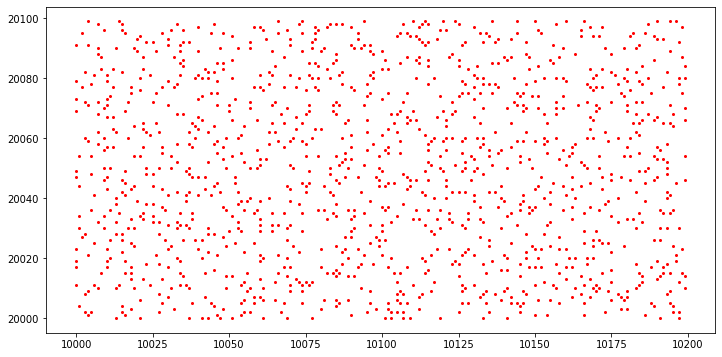

In [5]:
b = gprimes_in_block(10000, 20000, 200, 100)
b.plot()

Other standard numpy methods can be used to explore generated primes. Below we get the norms and angles of Gaussian primes from the block above and print the first 5.

In [6]:
norms = b[0] ** 2 + b[1] ** 2
angles = np.arctan2(b[1], b[0])
print(norms[:5])
print(angles[:5])

[500120017 500140013 500180017 500180029 500260169]
[1.10700873 1.10706873 1.10718871 1.10698875 1.10662885]


The only interesting arithmetic operation built into the `Gints` class is a mod operation based on the division algorithm in the Gaussian integers. Below we calculate the remainder upon division by $4 + 2i$ for Gaussian primes up to norm 1000.

In [27]:
a % (4 + 2j)

array([[ 1,  2,  1, -1, -1, -2,  0, -1,  1,  0,  2, -1,  1,  2,  1, -1,
         0, -2, -1,  0,  1,  0, -1,  1, -2,  0,  1,  2, -1,  2,  1,  1,
        -1,  0, -2,  1, -1,  2, -1, -2,  0, -1,  0, -1,  0, -1,  1,  0,
         1,  0,  1,  2,  2, -1, -1,  2, -2,  1, -2, -1, -1,  0, -1, -2,
         0, -1,  0,  1,  0, -1,  1,  2, -1,  2,  1,  1, -2,  1,  0,  0,
         1,  2, -1,  1,  2, -1,  0, -2,  1, -1,  0, -1,  0,  0,  1,  0,
         1, -1,  1,  0,  1, -2,  2, -1,  0, -1,  1,  0,  2,  1,  2,  1,
         1,  0,  1,  2, -2, -1, -1, -2, -1, -2,  2, -1, -2, -1,  0,  1,
        -1,  0,  0,  1,  0, -1,  1,  0,  0, -1,  2, -1,  0, -1,  1,  2,
         1, -2,  1,  0,  1, -2,  1,  0, -1, -2, -1,  2, -2,  1, -1,  0,
         0,  1,  1, -1,  0, -1,  2],
       [ 1,  1,  2, -2,  0,  1, -1, -2,  0, -1, -1,  0,  2, -1,  2, -2,
         1,  1, -2, -1,  2,  1,  0,  0,  1,  1,  0, -1, -2, -1,  0,  0,
        -2, -1,  1,  2,  0, -1,  0,  1, -1,  0,  1, -2, -1, -2,  0, -1,
         2, -1,  2, -1, -1,

## Racing Primes in Sectors and Angular Distribution

We use the mod operation above to race Gaussian primes in residue classes. We can also race Gaussian primes in sectors. Below we count primes with up to norm $10^9$ in several sectors in the complex plane.

In [41]:
for k in range(20):
    angle0 = k / 100
    angle1 = (k + 1) / 100
    count = count_gprimes_in_sector(10 ** 9, angle0, angle1)
    print('# of primes in sector [{:.2f}, {:.2f}) up to norm 10^9: {}'.format(angle0, angle1, count))

# of primes in sector [0.00, 0.01) up to norm 10^9: 324641
# of primes in sector [0.01, 0.02) up to norm 10^9: 323654
# of primes in sector [0.02, 0.03) up to norm 10^9: 323368
# of primes in sector [0.03, 0.04) up to norm 10^9: 324025
# of primes in sector [0.04, 0.05) up to norm 10^9: 323333
# of primes in sector [0.05, 0.06) up to norm 10^9: 324338
# of primes in sector [0.06, 0.07) up to norm 10^9: 323710
# of primes in sector [0.07, 0.08) up to norm 10^9: 323774
# of primes in sector [0.08, 0.09) up to norm 10^9: 323875
# of primes in sector [0.09, 0.10) up to norm 10^9: 323472
# of primes in sector [0.10, 0.11) up to norm 10^9: 323446
# of primes in sector [0.11, 0.12) up to norm 10^9: 323781
# of primes in sector [0.12, 0.13) up to norm 10^9: 323496
# of primes in sector [0.13, 0.14) up to norm 10^9: 323813
# of primes in sector [0.14, 0.15) up to norm 10^9: 324178
# of primes in sector [0.15, 0.16) up to norm 10^9: 323770
# of primes in sector [0.16, 0.17) up to norm 10^9: 3235

The `gintsieve` module contains the class `SectorRaceWrapper` which can be used to conduct races between two sectors.

In [3]:
s = SectorRaceWrapper(10 ** 7, .1, .2, .3, .5, 10000)

ValueError: Unfair race; try again with two equal-sized sectors.

We tried to race the primes in the sectors defined by the intervals $[0.1, 0.2)$ and $[0.3, 0.5)$. The two sectors must have the same size.

In [2]:
s = SectorRaceWrapper(10 ** 8, .1, .3, .3, .5, 10000)

Let $\pi(x; \alpha, \beta)$ denote the number of Gaussian primes up to norm $x$ with angle measure in the interval $[\alpha, \beta)$. Below the difference $\pi(x; \alpha, \beta) - \pi(x; \gamma, \delta)$ is plotted for 10000 intermediate values of up to $x$. The red curve represents the normalizing factor $\frac{\sqrt{x}}{\log x}$.

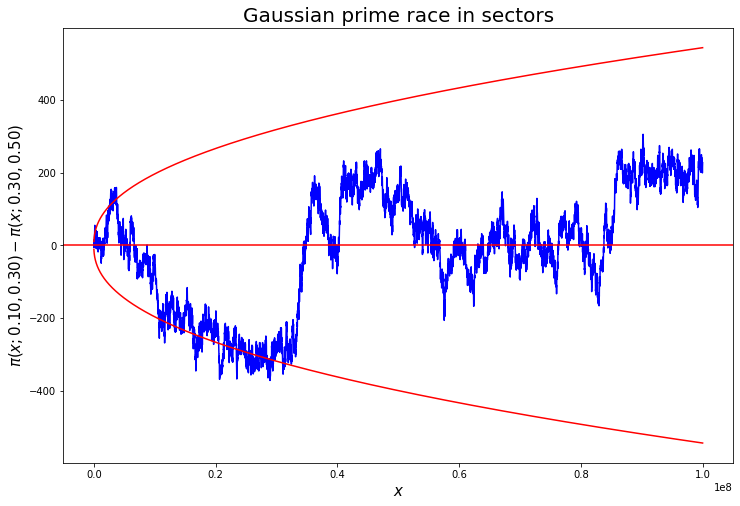

In [3]:
s.plot_race()

Plotting a Shanks-inspired histogram showing the ratio of the blue graph to the red graph in the plot above. Because there is no log-scaling, this histogram is not expected to converge to a probability distribution as $x\to\infty$. It does not appear particularly convergy...

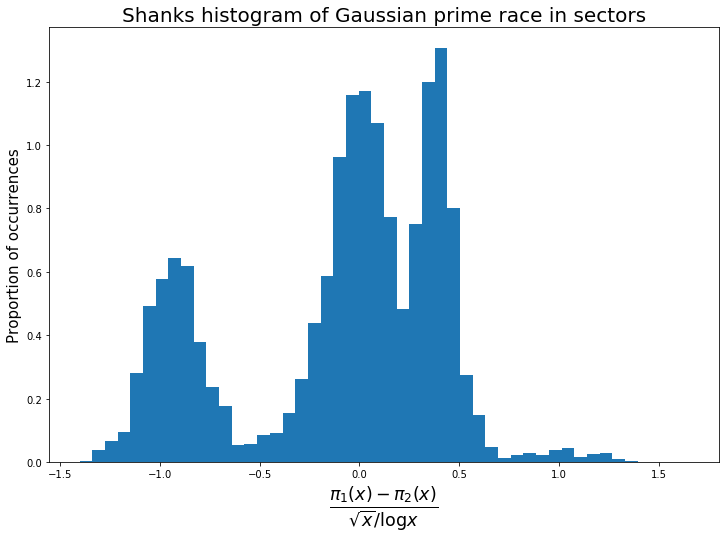

In [4]:
s.plot_shanks()

Most importantly, we can calculate the logarithmic density of the leader. This number may indeed converge as $x\to\infty$. to This race is fairly balanced. We can also plot the primes we are racing and color them by sector.

0.5214878964679773


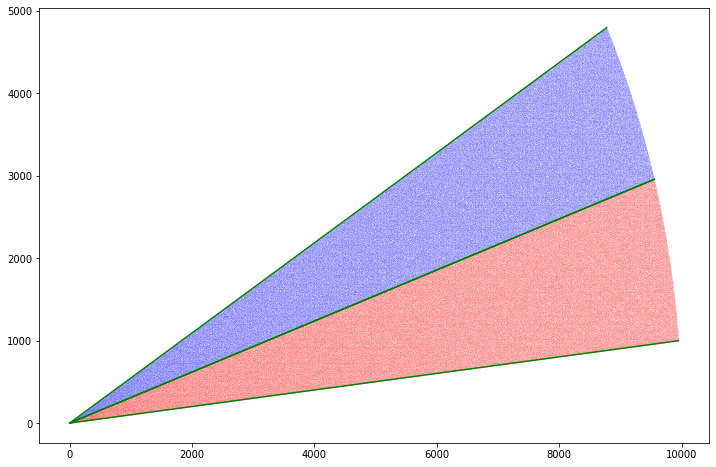

In [5]:
print(s.density())
s.plot_sectors()

Now we show a prime number race with more bias. The following call may take a few minutes to run.

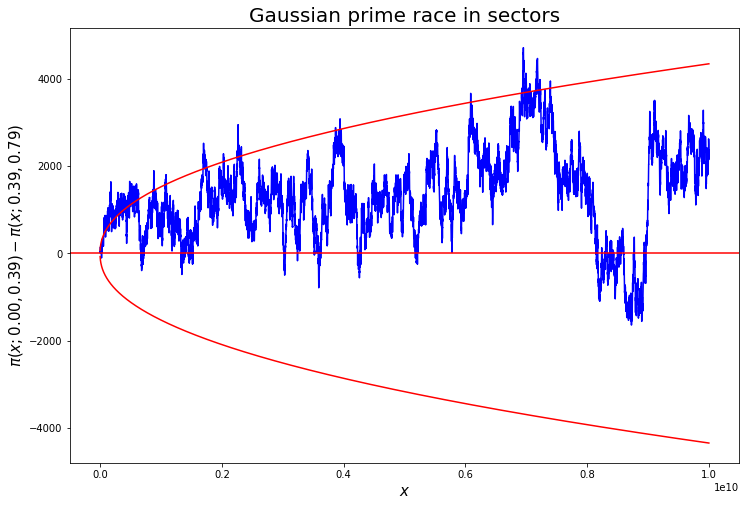

0.9748034447805646


In [11]:
s = SectorRaceWrapper(10 ** 10, 0, np.pi/8, np.pi/8, np.pi/4, 100000)
s.plot_race()
print(s.density())

And another race in narrower sectors. Empirically there seems to be plenty of bias in these sector races.

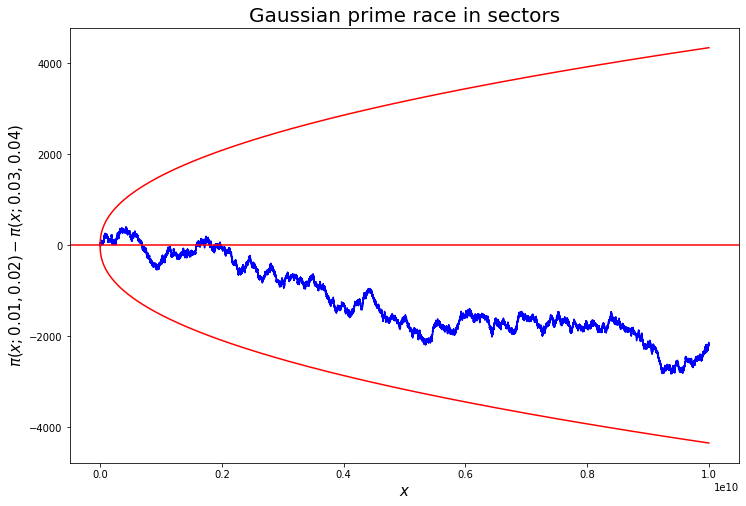

0.6485303018506459


In [27]:
s = SectorRaceWrapper(10 ** 10, .01, .02, .03, .04, 100000)
s.plot_race()
print(s.density())

The function `angular_dist(x, n)` plots a histogram of the distribution of the counts of Gaussian primes up to norm $x$ among $n$ equally-spaced sectors in the first quadrant. Some outliers (counts above the 99th percentile and below the 1st percentile) are omitted. For example, the sector containing the positive real-axis also contains every inert primes $p\equiv 3\bmod 4$, inflating its count. There is an optional flag to keep these outliers.

The histogram below looks normal, which gives supporting evidence that the error terms in prime counting functions over sectors vary normally across sectors. The analog in $\mathbb{Z}$ is the distribution of $\pi(x; n, a) - \frac1{\varphi(n)} \pi(x)$ as $a$ various over units mod $n$.

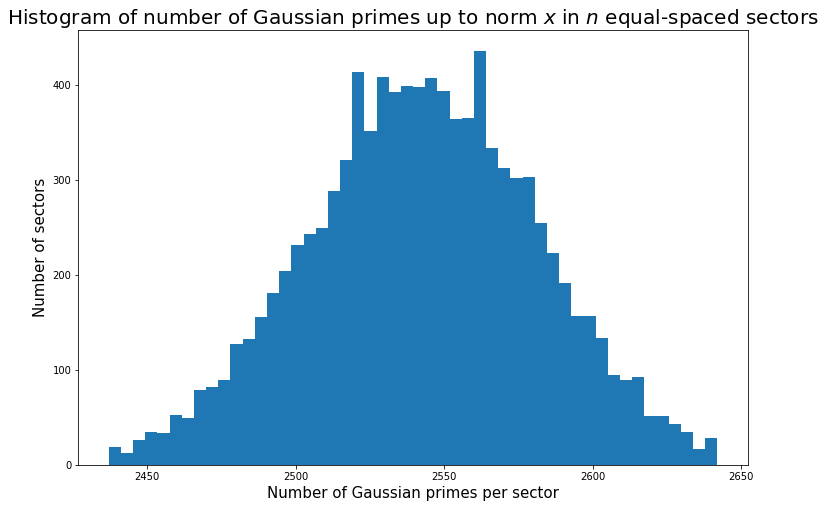

In [4]:
angular_dist(10 ** 9, 10000, ignore_outliers=True);

## The Gaussian Moat Problem

Below we show several functions to explore the Gaussian prime graph with a specified jump size.

In [7]:
moat_main_component(3.2).shape

(1, 31222)

In [1]:
from gintsieve import *
import primesieve.numpy as ps
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as mc
from collections import defaultdict
import plotly.express as px
import plotly.graph_objects as go

In [10]:
block = gprimes_block(10 ** 8, 0, 200, 200)
block[0] -= block.x
#block.plot()

bools = np.full((block.dx, block.dy), False)
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    bools[a][b] = True
    
distance = 5.0
close_points = []
for u in range(-int(distance), int(distance) + 1):
    for v in range(-int(distance), int(distance) + 1):
        if u ** 2 + v ** 2 <= distance ** 2 and (u or v):  # not both zero
            close_points.append((u, v))
            
edges = []
neighbors = defaultdict(list)  # coordinates of node are key, value is list of neighbors
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    for u, v in close_points:
        s, t = a + u, b + v
        if 0 <= s < block.dx and 0 <= t < block.dy and bools[s][t]:
            edges.append([(a, b), (s, t)])
            neighbors[(a, b)].append((s, t))
            
g_primes = []
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    g_primes.append((a, b))

visited = {}
for tup in g_primes:
    visited[tup] = False;



def dfs_component(p, component):
    visited[p] = True
    component.append(p)
    for q in neighbors[p]:
        if not visited[q]:
            dfs_component(q, component)
    


components = []
for p in g_primes:
    if not visited[p]:
        component = []
        dfs_component(p, component)
        components.append(component[:])  # making a copy

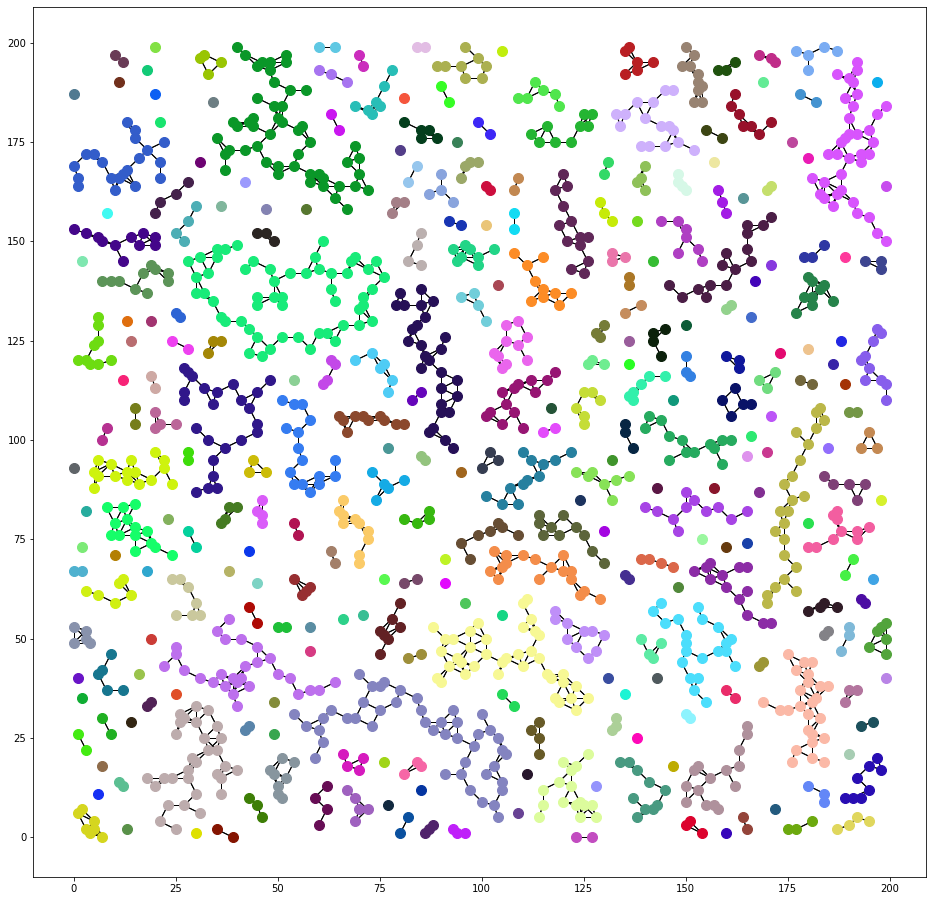

In [11]:
fig, ax = plt.subplots(figsize=(16, 16))
for component in components:
    x, y = list(zip(*component))  # zipping and unpacking
    color = np.random.rand(3, )
    ax.plot(x, y, color=color, linestyle='', marker='o', markersize=2000 / max(block.dx, block.dy))
    
lc = mc.LineCollection(edges, color='black', linewidth=1)
ax.add_collection(lc)
plt.show()

In [288]:
to_explore = []
explored = []
for i in range(block.shape[1]):
    a, b = block[0, i], block[1, i]
    if a < distance or b > block.dy - distance:
        to_explore.append((a, b))
        bools[a][b] = False

In [289]:
count = 0
while to_explore:
    a, b = to_explore.pop()
    for u, v in neighbors:
        s, t = a + u, b + v
        if 0 <= s < block.dx and 0 <= t < block.dy and bools[s][t]:
            to_explore.append((s, t))
            bools[s][t] = False
    explored.append((a, b))
    count += 1
    if count % 100:
        print('.', end='')
    else:
        print('.')
            

........................................................................................

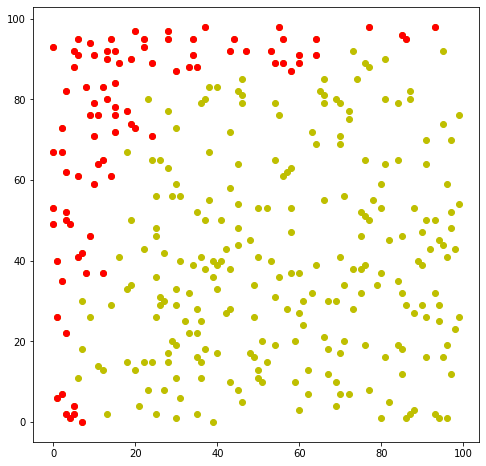

In [290]:
plt.subplots(figsize=(8, 8))
plt.plot(block[0], block[1], 'yo')
plt.plot([tup[0] for tup in explored], [tup[1] for tup in explored], 'ro')

In [ ]:
# See page 30 https://thekeep.eiu.edu/theses/2467/

In [19]:
import numpy as np

In [32]:
class Test(np.ndarray):
    """Class to wrap np arrays returned by sieve calls."""

    def __new__(cls, arr, att):
        obj = np.asarray(arr).view(cls)
        obj.att = att
        return obj
    
    def __array_finalize__(self, obj):
        print('hello world')

        
arr = np.zeros((3, 4))
t = Test(arr, 'yo')
z = t.view(np.ndarray)
arr[1][2] = 7
z

hello world


array([[0., 0., 0., 0.],
       [0., 0., 7., 0.],
       [0., 0., 0., 0.]])

Looking at connected component sizes for rational primes.

In [6]:
x = 10 ** 12
y = 4 * 10 ** 6

def get_component_sizes(gaps, dist):
    a = np.where(gaps <= dist, 1, 0)
    a_ext = np.concatenate(([0], a, [0]))
    idx = np.nonzero(a_ext[1:] != a_ext[:-1])[0]
    a_ext[1:][idx[1::2]] = idx[::2] - idx[1::2]  # redefining
    a_cum = a_ext.cumsum()
    idx = np.where(a_cum == 0)[0]  # redefining
    return a_cum[idx[1:] - 1] + 1


p = ps.primes(x, x + y)
gaps = np.diff(p)
dist = 4
component_sizes = get_component_sizes(gaps, dist ** 2)



gp = gprimes_block(10 ** 6, 0, 2 * 10 ** 3, 2 * 10 ** 3)
gp[0] -= gp.x
gp[1] -= gp.y

bools = np.full((gp.dx, gp.dy), False)
for i in range(gp.shape[1]):
    a, b = gp[0, i], gp[1, i]
    bools[a][b] = True
    
close_points = []
for u in range(-int(dist), int(dist) + 1):
    for v in range(-int(dist), int(dist) + 1):
        if u ** 2 + v ** 2 <= dist ** 2 and (u or v):  # not both zero
            close_points.append((u, v))
            
edges = []
neighbors = defaultdict(list)  # coordinates of node are key, value is list of neighbors
for i in range(gp.shape[1]):
    a, b = gp[0, i], gp[1, i]
    for u, v in close_points:
        s, t = a + u, b + v
        if 0 <= s < gp.dx and 0 <= t < gp.dy and bools[s][t]:
            edges.append([(a, b), (s, t)])
            neighbors[(a, b)].append((s, t))
            
g_primes = []
for i in range(gp.shape[1]):
    a, b = gp[0, i], gp[1, i]
    g_primes.append((a, b))

visited = {}
for tup in g_primes:
    visited[tup] = False;



def dfs_component(p, component):
    visited[p] = True
    component.append(p)
    for q in neighbors[p]:
        if not visited[q]:
            dfs_component(q, component)
    


g_components = []
for p in g_primes:
    if not visited[p]:
        component = []
        dfs_component(p, component)
        g_components.append(component[:])  # making a copy
        
g_component_sizes = [len(component) for component in g_components]

In [8]:
x0 = component_sizes
x1 = g_component_sizes

fig = go.Figure()
#fig.add_trace(go.Histogram(x=x0, name='rational primes'))
fig.add_trace(go.Histogram(x=x1, name='gaussian primes'))

# Overlay both histograms
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [7]:
g_component_sizes

[3,
 1,
 1,
 4,
 10,
 2,
 3,
 3,
 2,
 1,
 1,
 7,
 5,
 5,
 5,
 1,
 1,
 2,
 1,
 7,
 7,
 2,
 3,
 24,
 5,
 2,
 5,
 1,
 18,
 5,
 13,
 2,
 1,
 3,
 3,
 6,
 15,
 2,
 3,
 10,
 2,
 2,
 6,
 4,
 1,
 2,
 17,
 3,
 3,
 2,
 5,
 5,
 1,
 1,
 29,
 2,
 3,
 1,
 2,
 1,
 5,
 3,
 1,
 9,
 1,
 11,
 4,
 2,
 2,
 1,
 5,
 2,
 3,
 3,
 4,
 1,
 5,
 1,
 1,
 4,
 9,
 1,
 1,
 1,
 14,
 9,
 1,
 2,
 3,
 6,
 3,
 6,
 6,
 1,
 10,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 10,
 8,
 1,
 2,
 7,
 10,
 18,
 4,
 9,
 1,
 6,
 5,
 1,
 1,
 3,
 4,
 1,
 3,
 3,
 3,
 10,
 9,
 4,
 1,
 2,
 1,
 1,
 16,
 2,
 5,
 2,
 3,
 1,
 1,
 5,
 1,
 1,
 19,
 1,
 1,
 3,
 1,
 24,
 1,
 1,
 2,
 5,
 1,
 2,
 1,
 4,
 2,
 6,
 1,
 2,
 7,
 1,
 3,
 1,
 1,
 11,
 4,
 1,
 5,
 4,
 3,
 1,
 1,
 4,
 18,
 4,
 1,
 1,
 4,
 4,
 6,
 1,
 4,
 12,
 2,
 1,
 1,
 1,
 3,
 8,
 1,
 1,
 4,
 2,
 2,
 8,
 1,
 2,
 3,
 2,
 9,
 6,
 2,
 1,
 1,
 1,
 1,
 2,
 4,
 1,
 1,
 1,
 9,
 1,
 1,
 2,
 1,
 4,
 1,
 2,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 5,
 3,
 4,
 4,
 1,
 4,
 12,
 1,
 1,
 2,
 1,
 1,
 1,
 3,
 7,
 3,
 3,
 1,
 1,
 1,
 3